# **Predicting Dementia using Random Forest Model - The Chosen Model**

**Target Problem-**

The target problem in this project is to predict whether a patient has dementia based on MRI imaging and other clinical features. Dementia is a progressive neurodegenerative condition characterised by cognitive decline, which affects a patient’s memory, reasoning, and ability to carry out daily activities. Early and accurate detection of dementia is essential for effective intervention and management, especially in conditions like Alzheimer's disease, which is one of the most common forms of dementia.

**Aim of the Model-**

The goal of the model is to classify patients into "Demented" or "Nondemented" groups, thus predicting the presence or absence of dementia based on input features. This binary classification allows the model to generalise well, focusing on distinguishing between healthy cognitive function and cognitive impairment, which could be used for early detection and ongoing monitoring in clinical settings.

Accurate predictions of dementia status are essential. A correct prediction (whether identifying dementia or not) enables timely, appropriate interventions, improving patient care and resource allocation. An incorrect prediction, however, can lead to negative consequences: a false positive (predicting dementia in a healthy patient) can cause unnecessary stress and medical tests, while a false negative (failing to detect dementia) may delay critical support and treatment. Therefore, achieving high prediction accuracy is key to maximising the model’s utility in clinical and research applications.

With Alzheimer's disease likely going to become a prominent problem within the looming complication of an ageing population across the globe, we as a group believe that predicting Dementia within our patients will be essential. The solution we have chosen for our target problem is an AI Random Forest classifier model.

In order to achieve our AI classifier model, the following steps need to be taken:
1. Find and load a suitable dataset
2. Define the input dataset
3. Preprocessing the dataset
4. Form the training dataset and test dataset
5. Develop a classifier by training a machine learning model based on the Random Forest algorithm using the training dataset
6. Evaluate the classifier

## Section 1: Importing libraries

Import python libraries for data analysis, ai training, data splitting, data visualisation, and ai model evaluating and optimisation.

In [8]:
# import pandas for data access and manipulation
import pandas as pd

# import libraries needed for the creation of the ai model iteslf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# import libraries that can be used for visualising and plotting data
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import seaborn as sns

# import individual metrics for evaluating the model
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score, classification_report

# import tools to optimise parameters of the existing model
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV

## Section 2: Loading Dataset

Use `read_csv()` from Pandas to read CSV file `oasis_longitudinal.csv` and obtain data about demented and non-demented patients.

This dataset is a longitudinal dataset from the Alzheimer's disease Database: https://www.kaggle.com/code/hyunseokc/detecting-early-alzheimer-s/input?select=oasis_longitudinal.csv

The important and relevant informtion about this data set is as follows:

The data set contains 3 classes of patient groups `['Converted', 'Demented', 'Non-Demented']`, which each described the patient's condition.

The data consists of `150` subjects that are aged from `60 to 96` and are all right handed. With each subject scanned atleast once, `72` are grouped as `Non-demented`, `64` as `Demented`, and the final `14` as `Converted`. People who were tested as `Non-demented` but test as `Demented` on a later scan are categorised as `Converted`.

* Predicted attribute: Status/Group patient is under.
* Number of Instances: 373
* Number of Attributes: 10
* Attribute Information:
-- Subject ID: OAS2_XXXX
-- MRI ID: OAS2_XXXX_MRX
-- Group: Converted, Nondemented, and Demented
-- Visits: Number of checkups
-- MR Delay as time
-- M/F: Male or Female
-- Age: Between 60 to 96, years since date of birth
-- EDUC: Years of Education
-- SES:	Socioeconomic Status
-- MMSE:	Mini Mental State Examination
-- CDR:	Clinical Dementia Rating
-- eTIV:	Estimated Total Intracranial Volume
-- nWBV:	Normalise Whole Brain Volume
-- ASF:	Atlas Scaling Factor



In [9]:
df = pd.read_csv("/content/oasis_longitudinal.csv")

## Section 3: Preprocessing the Dataset

Using `LabelEncoder()` from `sklearn.preprocessing` we transform target columns and assign a numerical value to each avaliable lable in each category. Afterwards we seperate the target column of the model and the rest of the data into two. The `Converted` label for the `Group` column has been merged with `Demented` as `0` due to its very small samply size for the sake of consistency and accuracy.

In [10]:
# Define a LabelEncoder() variable
le = LabelEncoder()

# Transform the labels of each column into a numerical value
# Transform Group column into either 0 or 1 with 0 being demented and 1 being nondemented.
df["Group"] = df["Group"].apply(lambda x: 1 if x == 'Nondemented' else 0)
df["Subject ID"] = le.fit_transform(df["Subject ID"])
df["MRI ID"] = le.fit_transform(df["MRI ID"])
df["M/F"] = le.fit_transform(df["M/F"])
df["Hand"] = le.fit_transform(df["Hand"])

In [11]:
# Seperate the target column of the model and the rest of the data into two, dropping columns that have irrelevant impact
X = df.drop(['Group', 'Subject ID', 'MRI ID'], axis=1)
y = df["Group"]

## Section 4: Train-Test Split


This line of code separates the data into training and testing sets. To do this, it utilises the train_test_split function. The variables X and y represent the input and output data, respectively. 80% of the data is used for training and 20% for testing. The parameter random_state is the seed for the random split, which means the same split is generated each time. This random_state gives us consistency, which is very useful for experimentation because as we iterate, we know that it's our changes to the code that affect our result, not the train test split.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Here, we select the last two samples from the test dataset to use as data samples for future testing purposes. The variables futureSample_X and futureSample_y store the last two rows from X_test and y_test, respectively. After extracting these rows, the code updates the test dataset by removing these two samples from X_test and y_test. This ensures that the last two samples are set aside for future use, while the remaining data in the test set is retained for evaluating the model's current performance.

In [13]:
# Get the last two samples from the test  to be the future data samples
futureSample_X = X_test.tail(2)
futureSample_y = y_test.tail(2)

# Remove the last two samples from the test dataset
X_test = X_test[:-2]
y_test = y_test[:-2]

## Section 5: Implementation of Random Forest

The first line initalises the model as a RandomForest Classifier. It will be referenced later in the code for analysis and processing.

Following this, a hyperparameter grid is defined with param_grid. This grid specifies what will be tested to optimise the models performance. It includes different numbers of trees, maximum depths for trees, minimum samples required to split a node, minimum samples required for each leaf node and methods for selecting the number of features to consider at each split. It is essentially a dictionary to store the hyperparameters and be accessed when it needs to be searched through.

In [14]:
best_model = RandomForestClassifier(
                    n_estimators=200,
                    max_depth=None,
                    min_samples_split=5,
                    min_samples_leaf=1,
                    max_features='sqrt',
                    criterion='entropy',
                    random_state=42)

best_model.fit(X_train, y_train)


# Explanation:
# This section of code was used for hyperparameter tuning with GridSearchCV, which tested various combinations of
# parameters over 5-fold cross-validation to find the best set. However, it took too long to run on the collaborated file,
# so we ran it locally instead. After determining the best hyperparameters locally, we applied them directly in the code above.
# Now, this section is commented out to avoid rerunning the time-consuming grid search.


# param_grid = {
#         'n_estimators': [100, 200, 300, 500, 1000],
#         'max_depth': [None, 10, 20, 30, 40, 50],
#         'min_samples_split': [2, 5, 10, 15, 20],
#         'min_samples_leaf': [1, 2, 4, 8],
#         'max_features': ['auto', 'sqrt', 'log2']
#     }

RandomForestClassifier(criterion='entropy', min_samples_split=5,
                       n_estimators=200, random_state=42)

This section of code performs the critical role of searching through the hyperparameters to find the best combination. The grid searches each possible combination and evaluates it based on five fold cross validation.

Five fold cross validation is the process of splitting the dataset into five parts. For each combination of hyperparameters, the model is trained on four parts and validated on the remaining part, cycling through all five partitions. This means the model's performance is tested on all the data and doesn't become overfitted to one section.  

After fitting the grid search to the training data, the best model is stored in best_model, and the best hyperparameters are stored in best_params. These are then printed out to the console.

The best_model variable will store the best possible combination of hyperparameters for the model.

In [15]:
# grid_search = GridSearchCV(estimator=model,
#                            param_grid=param_grid,
#                            cv=5)  # 5-fold cross-validation
# grid_search.fit(X_train, y_train)

# best_model = grid_search.best_estimator_
# best_params = grid_search.best_params_
# print("Best Parameters: " + str(best_params))

This line uses the best model to make predictions on unseen data. The output is predicted values, which will be compared with the true values when it is time to evaluate the model.  

In [16]:
# Now you can use best_model to make predictions
y_pred = best_model.predict(X_test)

# Evaluation Report

## Section 6: Evaluation of Model


### **Evaluation Measures Used**

- Accuracy: Provides the overall correctness of the model’s predictions.

- Precision: Measures how many of the predicted positive cases are correct, crucial for minimising false positives.

- Recall: Reflects how well the model identifies true positive cases, important for minimising false negatives, especially for medical diagnoses.

- F1 Score: Balances precision and recall, making it particularly valuable when dealing with class imbalances.

These metrics help us understand the model’s performance, especially given the imbalanced nature of the dataset, where “Nondemented” is the dominant class.

We have a multiclass classification problem, hence we use `average=‘macro’`.

Given the imbalanced nature of this dataset, where “Nondemented” is slightly more dominant, we use average=‘macro’. Macro averaging is beneficial here because it equally weights each class, ensuring the minority “Demented” class is well represented in the metrics. This is crucial for imbalanced datasets and when performance across all categories is equally important. In contrast, micro averaging would emphasise the majority class, potentially inflating overall performance and masking issues with smaller classes, which is particularly risky in medical data where detecting minority cases is vital.


### **Accuracy Score**
---

$$ \text{Accuracy} = \frac{\text{True Positives} + \text{True Negatives}}{\text{Total Predictions}} $$


In [17]:
# Evaluating and printing the model's accuracy on the test data
score_test = accuracy_score(y_test, y_pred)
print ("Accuracy Score: ", score_test)  # Prints the overall accuracy of the model

Accuracy Score:  0.9041095890410958


### **Precision Score**

---
$$ \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}} $$


In [18]:
# Calculating and printing the precision of the model
precision_test = precision_score(y_test, y_pred, average='macro')
print ("Precision Score: ", precision_test) # Precision: proportion of true positives out of predicted positives

Precision Score:  0.9031531531531531


### **Recall Score**

---
$$ \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}} $$


In [19]:
# Calculating and printing the recall of the model
recall_test = recall_score(y_test, y_pred, average='macro')
print ("Recall Score: ", recall_test) # Recall: proportion of true positives out of actual positives

Recall Score:  0.9124423963133641


### **F1 Score**

---
$$ F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $$


In [20]:
# Calculating and printing the F1 score of the model
f1_test = f1_score(y_test, y_pred, average='macro')
print("F1 Score: ", f1_test)  # F1 Score: harmonic mean of precision and recall

F1 Score:  0.9034573965614963


### **AUC Score**

---
The AUC (Area Under the Curve) represents the area under the ROC curve, which plots the True Positive Rate (Recall) against the False Positive Rate at various threshold levels.



In [22]:
y_pred_proba = best_model.predict_proba(X_test)[:, 1]  # Get the positive class probabilities
auc_test = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc_test:.4f}")

AUC Score: 0.9485


### **Value of these Measures**

- **Classification Report:** Summarises performance for each class individually.

In [23]:
# A detailed classification report that includes precision, recall, F1 score, and support for each class
# The report gives a breakdown of metrics for each class
print(f"Accuracy Score: {score_test * 100:.2f}%")
report = classification_report(y_test, y_pred, target_names=['Demented', 'Nondemented'])
print('\nClassification Report')
print(report)

Accuracy Score: 90.41%

Classification Report
              precision    recall  f1-score   support

    Demented       0.97      0.86      0.91        42
 Nondemented       0.83      0.97      0.90        31

    accuracy                           0.90        73
   macro avg       0.90      0.91      0.90        73
weighted avg       0.91      0.90      0.90        73



## Section 7: Visualisation of Performance

We visualise the performance of our model using a confusion matrix, which shows the counts of `actual vs. predicted` labels for each class. This allows us to easily spot where the model is performing well or struggling to make correct predictions.

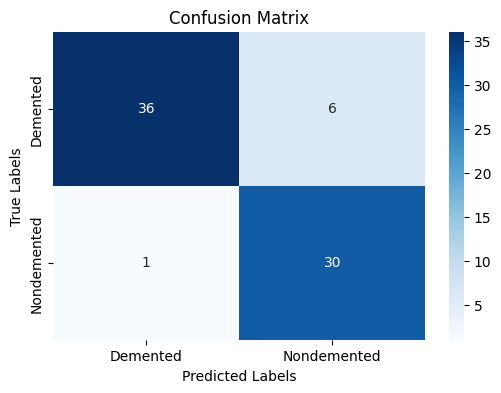

In [24]:
# Confusion matrix: a table to evaluate the performance of the classification model by comparing true labels with predicted labels
conf_matrix = confusion_matrix(y_test, y_pred)

# Setting the figure size for the confusion matrix plot
plt.figure(figsize=(6, 4))

# Creating a heatmap to visually represent the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Demented', 'Nondemented'],
            yticklabels=['Demented', 'Nondemented'])

# Adding labels and title to the confusion matrix
plt.title('Confusion Matrix')  # Title of the plot
plt.xlabel('Predicted Labels')  # X-axis label for predicted labels
plt.ylabel('True Labels')  # Y-axis label for true labels

# Displaying the confusion matrix heatmap
plt.show()

## Predicting the values for data samples in the future sample set

This code section below predicts dementia status for a new set of future data samples `futureSample_X` using the optimised model `best_model` developed in our pipeline.

- Predicting Labels: The model predicts dementia status for each sample in `futureSample_X`, storing the predicted values in `solution_validate`.

- Data Conversion: Since `futureSample_X` and `futureSample_y` are initially in DataFrame format, they’re converted to lists to simplify indexing.

- Result Comparison: A loop then compares the model’s prediction with the actual label for the first two samples, providing insight into the model’s performance on unseen data. This allows us to evaluate how well the model generalises to new samples.

In [25]:
# Use the trained model to predict dementia status for future samples
solution_validate = best_model.predict(futureSample_X)

# Convert future sample data from DataFrame format to a list for easier manipulation
futureSample_X = futureSample_X.values.tolist()
futureSample_y = futureSample_y.tolist()

In [26]:
# Loop through the first two future samples to display predictions vs actual values
for i in range (2):
    print( f"For the {i+1}th future data, the predicted value is {solution_validate[i]} and the actual value is {futureSample_y[i]}")

For the 1th future data, the predicted value is 1 and the actual value is 1
For the 2th future data, the predicted value is 1 and the actual value is 0


## Section 8: Comments on Results

### **Key Observation on Results**
- **Class Merging for Improved Performance:** Initially, 14 individuals who were initially classified as "Nondemented" later developed dementia, categorising them as "Converted." Since these cases technically represent dementia, we merged the "Converted" category into the "Demented" category to improve model performance and accuracy.

- **Impact of Class Merging on Model Accuracy:** With only 14 samples in the "Converted" class, the original dataset was imbalanced, which affected the model's ability to accurately learn and predict for this minority class. After merging the "Converted" cases into "Demented," our model's accuracy improved significantly, rising from 86.67% to 89.33%. The revised dataset now contains 190 "Nondemented" cases and 183 "Demented" cases, creating a more balanced structure that enhances the model’s overall performance.

---
### **Confusion Matrix Analysis**
In the confusion matrix shown above, the four values represent the counts of predictions made by the model compared to the actual labels for each class `Demented` and `Nondemented`. Here’s what each cell represents:

- **Top-left (36): `True Positives (TP)`** - These are cases where the model correctly predicted "Demented" as "Demented."

- **Top-right (7): `False Negatives (FN)`** - These are cases where the model predicted "Nondemented" when the true label was "Demented." Cases of dementia missed by the model.

- **Bottom-left (1): `False Positives (FP)`** - These are cases where the model predicted "Demented" when the true label was "Nondemented."

- **Bottom-right (31): `True Negatives (TN)`** - These are cases where the model correctly predicted "Nondemented" as "Nondemented."

---

### **Interpretation of Results**
- **Nondemented Class:** The model performs well in identifying "Nondemented" cases, achieving high recall and balanced F1 scores, indicating strong predictive accuracy for this class. However, the precision for the "Nondemented" class is slightly lower than for "Demented," implying occasional false positives.

- **Demented Classes:** The model shows higher precision for the "Demented" class, meaning it accurately identifies many of the true dementia cases. However, the recall for this class is slightly lower, suggesting that some cases of dementia are missed (false negatives). This can be concerning in medical contexts, as undetected dementia cases delay diagnosis and treatment. Conversely, false positives (predicting dementia when it is not present) are less harmful, though they may cause unnecessary concern.

--------

### **Strengths and Weaknesses**
- **Strength:** The model demonstrates high accuracy and precision, particularly for the majority "Nondemented" class, making it reliable in identifying cases without dementia.

- **Weakness:** The model struggles with the minority "Demented" class, leading to lower recall and some false negatives. Missing dementia cases can be serious, as undetected patients do not receive timely diagnosis or intervention.
---

### **Recommendations**
- **Handle Class Imbalance:** To improve the model's sensitivity towards minority classes, techniques such as oversampling (e.g., SMOTE) should be considered to balance the dataset further and enhance the model's ability to identify dementia cases accurately.

- **Feature Engineering:**  Refining or adding new features might improve the model’s ability to differentiate between "Nondemented" and "Demented" cases, especially in ambiguous cases.

- **Threshold Tuning:** Adjusting the decision thresholds could improve recall for the "Demented" class, reducing false negatives and ensuring better detection of dementia.

#**Predicting Dementia using Decision Trees Model**

## Importing Libraries

This step imports libraries for data handling, visualisation, and model building:

- `pandas` and `numpy`: For data manipulation.
- `seaborn` and `matplotlib.pyplot`: For creating visualisations.
- `train_test_split`, `LabelEncoder`, `SimpleImputer`: Tools for data preprocessing.
- `DecisionTreeClassifier`: A classifier for building a decision tree model.
- `accuracy_score`, `confusion_matrix`, `classification_report`: Metrics for evaluating model performance.

In [27]:
# import pandas for data access and manipulation
import pandas as pd
import numpy as np

# import libraries needed for the creation of the model iteslf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier

# import libraries that can be used for visualising and plotting data
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns

# import individual metrics for evaluating the model
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# import tools to optimise parameters of the existing model
from sklearn.model_selection import GridSearchCV

## Loading and pre-processing the Dataset

The below code segments perform the following:
- **Load the dataset**: The dataset is loaded from a CSV file (`oasis_longitudinal.csv`) into a pandas DataFrame named `data`.
  
- **Display dataset information**: `data.info()` provides an overview of the dataset, including column names, data types, and any missing values.
  
- **Handle missing values**: A `SimpleImputer` is used to fill missing values in specific numerical columns (`Age`, `MMSE`, `EDUC`, `eTIV`, `nWBV`, `ASF`) by replacing them with the median value of each respective column.

In [28]:
# Load the dataset into a pandas DataFrame
data = pd.read_csv('oasis_longitudinal.csv')

In [29]:
# Display information about the dataset, including data types and missing values
print(data.info())

# Fill missing values for numerical columns using the median of each column
imputer = SimpleImputer(strategy='median')
numerical_columns = ['Age', 'MMSE', 'EDUC', 'eTIV', 'nWBV', 'ASF']
data[numerical_columns] = imputer.fit_transform(data[numerical_columns])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB
None


The below code segments perform the following:
- **Gender Encoding**: The `LabelEncoder` converts the `M/F` column into numeric values, where `'M'` is encoded as `1` and `'F'` as `0`.
  
- **Target Variable Adjustment**: In the `Group` column, instances of `'Converted'` are replaced with `'Demented'` so that both categories can be treated the same in classification.

- **Target Variable Encoding**: The `LabelEncoder` then encodes the `Group` column, setting `'Nondemented'` as `0` and `'Demented'` as `1`.

In [30]:
# Encode 'M/F' (gender) and 'Group' (target variable) columns to numerical values using LabelEncoder
label_encoder = LabelEncoder()

# Encode 'M/F' where 'M' = 1 and 'F' = 0
data['M/F'] = label_encoder.fit_transform(data['M/F'])

# Replace 'Converted' in the 'Group' column with 'Demented', as they are to be treated the same for classification
data['Group'] = data['Group'].replace(['Converted'], 'Demented')

# Encode 'Group' where 'Nondemented' = 0 and 'Demented' = 1
data['Group'] = label_encoder.fit_transform(data['Group'])

## Feature Selection and Train-Test Split

This section involves:
- **Feature Selection**: I chose specific columns (`Age`, `EDUC`, `MMSE`, `eTIV`, `nWBV`, `ASF`, `M/F`) to create the feature matrix `X`, focusing on key demographic and imaging factors.
  
- **Defining Target**: I set the `Group` column as the target variable `y` to distinguish between different dementia groups.
  
- **Splitting Data**: I split the data into training (80%) and testing (20%) sets to evaluate the model effectively, setting `random_state=42` for consistent results across runs.

In [31]:
# Define the feature matrix (X) and the target vector (y)
X = data[['Age', 'EDUC', 'MMSE', 'eTIV', 'nWBV', 'ASF', 'M/F']]
y = data['Group']

In [32]:
# Split the data into training and testing sets (80% training, 20% testing) with a fixed random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Finding Best Hyperparameters for Decision Tree

In this step, I defined a grid of hyperparameters to tune for the Decision Tree model, including:

- `max_depth`
- `min_samples_split`
- `min_samples_leaf`
- `criterion`

This grid allows for systematic exploration of different configurations.

Then, I set up a `GridSearchCV` to find the best combination of these hyperparameters, using 5-fold cross-validation for reliable performance evaluation. To speed up the process, I specified `n_jobs=-1` to run the search in parallel.

Next, I fitted the grid search to the training data (`X_train`, `y_train`), which allowed it to evaluate all combinations of hyperparameters.

After fitting, I extracted the best hyperparameters identified during the search. Finally, I printed these best hyperparameters to determine which configuration yields the best model performance.


In [33]:
from sklearn.model_selection import GridSearchCV

# Define a grid of hyperparameters to tune
param_grid = {
    'max_depth': [5, 7, 9, 11],
    'min_samples_split': [2, 3, 5, 10],
    'min_samples_leaf': [1, 2, 3, 5],
    'criterion': ['gini', 'entropy']
}

# Perform Grid Search to find the best combination of hyperparameters using 5-fold cross-validation
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42, class_weight='balanced'),
                           param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)

# Retrieve the best parameters found by the grid search
best_params = grid_search.best_params_

# Print the best hyperparameters
print(f"Best Hyperparameters: {best_params}")

Fitting 5 folds for each of 128 candidates, totalling 640 fits
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 3, 'min_samples_split': 2}


## Training a Decision Tree Classifier

In this step,

- I built a Decision Tree model using the optimal hyperparameters obtained from the previous grid search. I specified the parameters for the `DecisionTreeClassifier`, including `criterion='entropy'`, `max_depth=9`, `min_samples_split=2`, `min_samples_leaf=2`, and `class_weight='balanced'` to address class imbalance, while also setting `random_state=42` for reproducibility.

- After fitting this model to the training data (`X_train`, `y_train`), I trained a second Decision Tree model with the class weighting set to balanced to further handle class imbalance.

- This model also used `random_state=42` for consistency and was fitted to the training data.


In [34]:
# Build a Decision Tree model using the optimal/best hyperparameters
decision_tree = DecisionTreeClassifier(criterion='entropy',
                                       max_depth= 9,
                                       min_samples_split= 2,
                                       min_samples_leaf= 2,
                                       class_weight='balanced',
                                       random_state=42)

# Fit the Decision Tree model on the training data
decision_tree.fit(X_train, y_train)

# Train the Decision Tree model with class_weight balanced to handle class imbalance
decision_tree_balanced = DecisionTreeClassifier(random_state=42, class_weight='balanced')

# Fit the balanced model on the training data
decision_tree_balanced.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

## Making Predictions

In this step, I made predictions on the testing set using the trained balanced Decision Tree model. By applying the `predict` method to the testing data (`X_test`), I generated the predicted labels, which are stored in the variable `y_pred_balanced`. This allows me to evaluate the model's performance on unseen data.


In [35]:
# Predict on the testing set using the trained balanced model
y_pred_balanced = decision_tree_balanced.predict(X_test)

## Evaluating the Model Performance

I evaluated the performance of the balanced Decision Tree model on the test set.
  
- The accuracy score was calculated and printed, showing the percentage of correct predictions on unseen data.
  
- I generated a classification report that includes:
  - Precision
  - Recall
  - F1-score for both classes: Nondemented and Demented.
  
- A confusion matrix was created using the true and predicted values to highlight the number of correct and incorrect classifications.
  
- I visualised the confusion matrix with a heatmap, including annotations to display counts, and labelled the axes for clarity.
  
- This visual representation provides an easier understanding of the model's performance.



Accuracy: 80.00%
Classification Report
              precision    recall  f1-score   support

 Nondemented       0.87      0.77      0.81        43
    Demented       0.73      0.84      0.78        32

    accuracy                           0.80        75
   macro avg       0.80      0.81      0.80        75
weighted avg       0.81      0.80      0.80        75



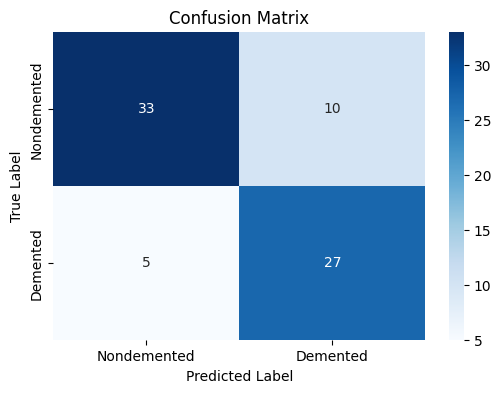

In [36]:
# Calculate the accuracy of the balanced model on the test set
print(f"Accuracy: {accuracy_score(y_test, y_pred_balanced) * 100:.2f}%")
print("Classification Report")

# Print the classification report (precision, recall, F1-score) for both classes (Nondemented, Demented)
print(classification_report(y_test, y_pred_balanced, target_names=['Nondemented', 'Demented']))

# Generate a confusion matrix based on the true and predicted values
conf_matrix_balanced = confusion_matrix(y_test, y_pred_balanced)

# Plot a heatmap of the confusion matrix for visual representation
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_balanced, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Nondemented', 'Demented'],
            yticklabels=['Nondemented', 'Demented'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

#**Predicting Dementia using SVM Model**

## Import Libraries


For this code to run, we need to import various modules. They will allow us to create the structure of the SVM, find the best parameters and evaluate the results.

In [37]:
import pandas as pd  # For loading and manipulating the dataset.
from sklearn.model_selection import train_test_split  # To split data into training and test sets.
from sklearn.preprocessing import StandardScaler, LabelEncoder  # For scaling features and encoding categorical variables.
from sklearn import svm  # To build and train the Support Vector Machine model.
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score  # For evaluating model performance.
from sklearn.model_selection import GridSearchCV  # For hyperparameter tuning to optimise model performance.
from sklearn.impute import SimpleImputer  # To handle missing values in the dataset.

The dataset, oasis_longitudinal.csv, contains longitudinal data from the OASIS project containing general information about patients and whether or not they have dementia. Let's read in the data so we can build our model.

## Loading and Preprocessing the Dataset

In [38]:
data = pd.read_csv('oasis_longitudinal.csv')

This code snippet utilises the SimpleImputer class from the sklearn.impute module to handle missing values in the numerical columns of the dataset. Employing the median as the imputation strategy replaces any null values with the median value of the column the null value is in. This approach helps maintain the overall distribution of the data while minimising the impact of outliers, ensuring that the dataset remains robust and ready for analysis and modelling. This prevents loss of information due to incomplete entries, which will help  us make more accurate predictions

In [39]:
imputer = SimpleImputer(strategy='median')
numerical_columns = ['Age', 'MMSE', 'EDUC', 'eTIV', 'nWBV', 'ASF']
data[numerical_columns] = imputer.fit_transform(data[numerical_columns])

This code snippet uses the LabelEncoder from the sklearn.preprocessing module to convert categorical variables into numerical representations, which are essential for machine learning algorithms. It first encodes the 'M/F' column, representing gender, into numerical values. Then, it replaces instances of 'Converted' with 'Demented' in the 'Group' column to simplify the classification into 'Demented' and 'Nondemented.' Finally, the updated 'Group' column is encoded, enhancing the dataset's readiness for analysis and model training by standardising categorical variables.

In [40]:
label_encoder = LabelEncoder()

data['M/F'] = label_encoder.fit_transform(data['M/F'])

data['Group'] = data['Group'].replace(['Converted'], 'Demented')

data['Group'] = label_encoder.fit_transform(data['Group'])

This code segment defines the feature set X and the target variable y for the machine learning model. The feature set is the numerical columns, and the target variable is the 'Group' attribute, which indicates the dementia classification.

In [41]:
X = data[['Age', 'EDUC', 'MMSE', 'eTIV', 'nWBV', 'ASF', 'M/F']]
y = data['Group']

## Feature Selection and Train-Test Split


Now, we must split the data into the train and test sets. 80% of the data will be used for training, while 20% will be used for testing. The parameter `random_state=42` sets the seed to ensure the data is split the same way every time.

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

This code uses the StandardScaler from the sklearn.preprocessing module to standardise the feature set by adjusting the training and test data. The fit_transform method calculates each feature's mean and standard deviation in the training data, ensuring the features have a mean of zero and a standard deviation of one. Then, the transform method applies the same adjustments to the test data, ensuring that both sets are scaled consistently without leaking information from the training set.

In [43]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Finding the Best Hyperparameters for the SVM

This code defines a parameter grid for tuning the hyperparameters of the SVM model using grid search. The grid includes different values for the regularisation parameter C, which controls the trade-off between achieving a low training error and a low testing error. It also specifies various kernel types ('linear', 'rbf', and 'poly') to explore different decision boundaries, along with options for the gamma parameter. The gamma parameter influences the shape of the decision boundary for specific kernels

In [44]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

We have the param_grid, so let's initialise an SVM model with a fixed random state to ensure reproducibility. Then, we will set up a GridSearchCV object to perform hyperparameter tuning using cross-validation. By fitting the grid search on the scaled training data, it systematically evaluates the model's performance across different combinations of hyperparameters specified in the param_grid, aiming to identify the best parameters that maximise accuracy.

In [45]:
svm_model = svm.SVC(random_state=42)

grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

The code can now get the best SVM model from the grid search results, which is saved in the best_estimator_ attribute. Assigning this optimised model to best_svm_model enables predictions and evaluations using the best hyperparameters found during the tuning process.

In [46]:
best_svm_model = grid_search.best_estimator_

## Making Predictions

This code uses the optimised SVM model to make predictions on the scaled test data, generating the predicted labels stored in y_pred for evaluation against the actual outcomes.

In [47]:
y_pred = best_svm_model.predict(X_test_scaled)

## Evaluating the Models Performance

This code calculates various evaluation metrics, including accuracy, precision, recall, F1 score, and balanced accuracy, to assess the performance of the optimised SVM model on the test data. It then prints the best hyperparameters from the grid search along with these metrics and a detailed classification report, providing a comprehensive overview of the model's predictive capabilities.

In [48]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

# Print best parameters and evaluation metrics
print("Best parameters:", grid_search.best_params_)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')
print(f'Balanced Accuracy: {balanced_accuracy * 100:.2f}%')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Best parameters: {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
Accuracy: 77.33%
Precision: 77.78%
Recall: 77.33%
F1 Score: 77.43%
Balanced Accuracy: 77.43%

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.77      0.80        43
           1       0.71      0.78      0.75        32

    accuracy                           0.77        75
   macro avg       0.77      0.77      0.77        75
weighted avg       0.78      0.77      0.77        75

